In [2]:
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog

# DISPLAY IMAGES

In [11]:
import random
my_col = {"sai so":[]}
for i in range(0, 50):
    data = round(random.uniform(0, 0.4), 2)
    my_col["sai so"].append(data)
data = pd.DataFrame(my_col)
data.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

In [418]:
#import training dataset of vehicles/non-vehicles
import glob
cashew = glob.glob('data/cashew/*.png')
no_cashew = glob.glob('data/no_cashew/*.png')

In [419]:
len(cashew)

203

In [420]:
len(no_cashew)

730

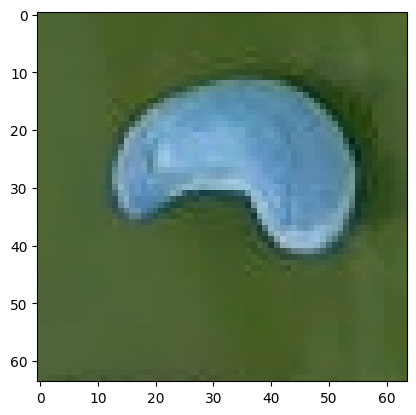

In [421]:
image_color = cv2.imread(cashew[100])
plt.imshow(image_color)

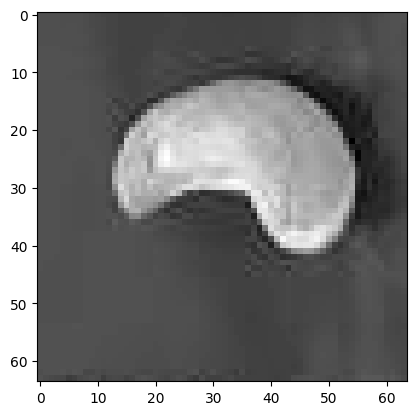

In [422]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

# GET HOG FEATURES

In [423]:
features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualize = True, 
                          feature_vector = True)
features.shape 

(396,)

In [424]:
hog_image.shape

(64, 64)

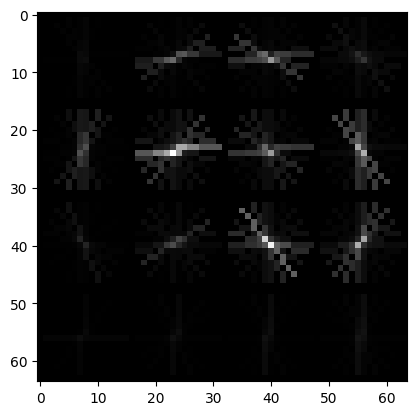

In [425]:
plt.imshow(hog_image, cmap = 'gray')

# HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION

HOG with cashew

In [426]:
cashew_hog_accum = []
for i in cashew:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    cashew_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
    cashew_hog_accum.append(cashew_hog_feature)

In [427]:
X_cashew = np.vstack(cashew_hog_accum).astype(np.float64)  
y_cashew = np.ones(len(X_cashew))

In [428]:
X_cashew.shape

(203, 396)

In [429]:
y_cashew.shape

(203,)

HOG with no cashew

In [430]:
nocashew_hog_accum = []
for i in no_cashew:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    nocashew_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
    nocashew_hog_accum.append(nocashew_hog_feature)

In [431]:
X_nocashew = np.vstack(nocashew_hog_accum).astype(np.float64)  
y_nocashew = np.zeros(len(X_nocashew))

In [432]:
X_nocashew.shape

(730, 396)

In [433]:
y_nocashew.shape

(730,)

Ghép 2 cái lại

In [434]:
X = np.vstack((X_cashew, X_nocashew))
X.shape

(933, 396)

In [435]:
y = np.hstack((y_cashew, y_nocashew))
y.shape

(933,)

# SVM MODEL CLASSIFIER TRAINING 

In [436]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [437]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = SVC(kernel = 'rbf', random_state = 0, probability=True)
svc_model.fit(X_train,y_train)

SVC(probability=True, random_state=0)

<Axes: >

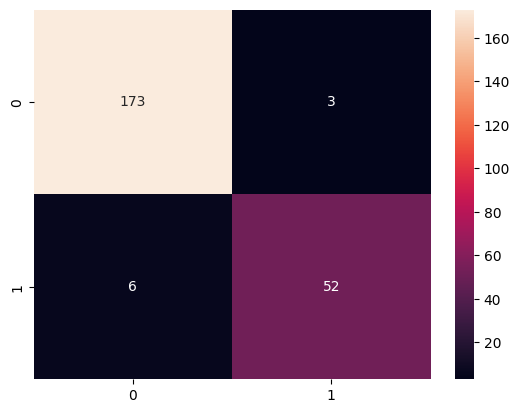

In [438]:
y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [439]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       176
         1.0       0.95      0.90      0.92        58

    accuracy                           0.96       234
   macro avg       0.96      0.94      0.95       234
weighted avg       0.96      0.96      0.96       234



# IMPROVE THE MODEL 

In [440]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(kernel = 'rbf', random_state = 0, probability=True),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.791 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

SVC(C=100, gamma=0.1, probability=True, random_state=0)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       176
         1.0       0.93      0.93      0.93        58

    accuracy                           0.97       234
   macro avg       0.95      0.95      0.95       234
weighted avg       0.97      0.97      0.97       234



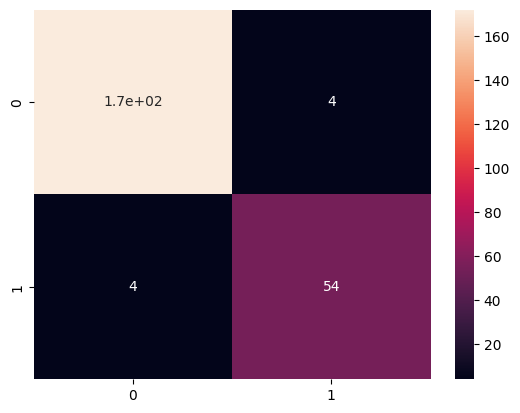

In [441]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# TEST THE MODEL (FIND Cashews)!

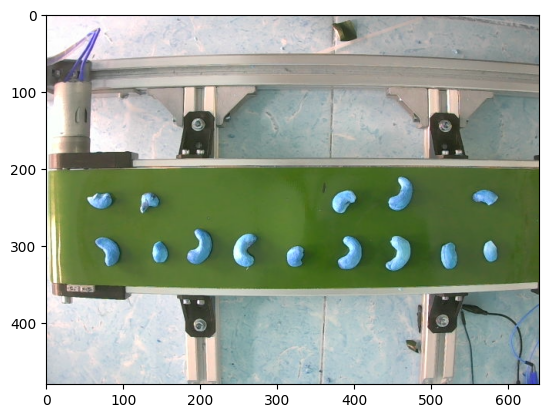

In [551]:
test_image = cv2.imread('data/raw_data/frame_330.png')
plt.imshow(test_image)
# test_image = test_image.astype(np.float32)/255

(128, 640, 3)

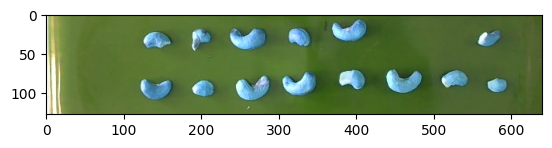

In [520]:
y_start = 210
y_stop = 338
x_start = 0
x_stop = 0

pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 2

masked_region = test_image[y_start:y_stop,:,:]
plt.imshow(masked_region)
masked_region.shape

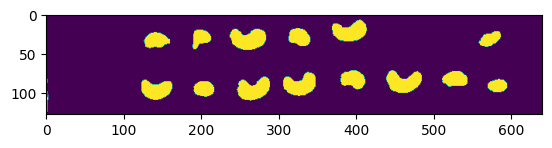

In [558]:
dup_image = masked_region.copy()
black_img = np.zeros((dup_image.shape[0], dup_image.shape[1], 3))
gray_img = cv2.cvtColor(dup_image, cv2.COLOR_BGR2YCR_CB)
(thresh, blackAndWhiteImage) = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage[:, :, [1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


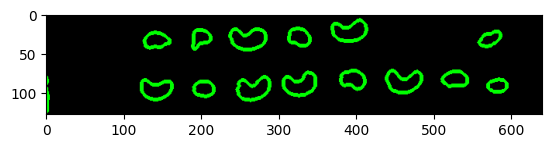

In [559]:
green = (0, 255, 0)
_, threshold = cv2.threshold(blackAndWhiteImage[:, :, [1]], 200, 450, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(
        threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # tìm đường bao

cv2.drawContours(black_img, contours, -1, green, 3)
plt.imshow(black_img)

In [595]:
def find_contour_areas(contours):
    areas = []
    for cnt in contours:
        cont_area = cv2.contourArea(cnt)
        areas.append(cont_area)
    return areas

print("Contor areas", find_contour_areas(contours))

sorted_contours_area = sorted(contours, key = cv2.contourArea, reverse=True)
sorted_areas = find_contour_areas(sorted_contours_area)
print("Contor areas after sorting: ", sorted_areas)

avg = 0
for i in range(0, 4):
    avg += sorted_areas[i]/5
    
result_contour = []
for sc in sorted_contours_area:
    area = cv2.contourArea(sc)
    if area < avg and area > 100:
        result_contour.append(sc)

Contor areas [21.0, 2.5, 392.5, 705.0, 305.5, 824.5, 5.0, 809.5, 478.5, 847.0, 535.5, 464.0, 342.5, 364.5, 895.0, 462.0, 807.0]
Contor areas after sorting:  [895.0, 847.0, 824.5, 809.5, 807.0, 705.0, 535.5, 478.5, 464.0, 462.0, 392.5, 364.5, 342.5, 305.5, 21.0, 5.0, 2.5]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


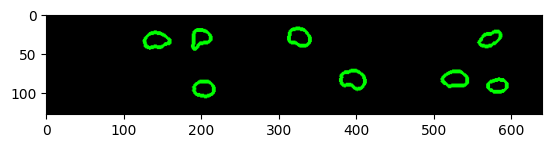

In [596]:
black_img = np.zeros((dup_image.shape[0], dup_image.shape[1], 3))
cv2.drawContours(black_img, result_contour, -1, green, 3)
plt.imshow(black_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


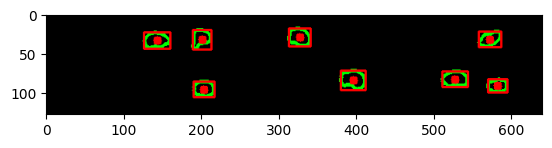

In [598]:
rectangles = []
centroid_points = []
for cnt in result_contour:
    (x, y, w, h) = cv2.boundingRect(cnt)  # khoanh vùng nhị phân
    rectangles.append((x, y, w, h))
for rectangle in rectangles:
    (x, y, w, h) = rectangle
    cv2.rectangle(black_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    x_c, y_c = int((2*x + w)/2), int((2*y+h)/2)
    centroid_points.append((x_c, y_c))
    cv2.line(black_img, (x_c, y_c), (x_c+1, y_c+1), (255, 0, 0), 10)
    
plt.imshow(black_img)

In [599]:
centroid_points

[(396, 84),
 (527, 83),
 (143, 33),
 (327, 29),
 (203, 96),
 (201, 32),
 (572, 32),
 (582, 91)]

(128, 640, 3)
Predict: [1.], predict_proba: 
[[0.21031997 0.78968003]]
Predict: [1.], predict_proba: 
[[0.11275033 0.88724967]]
Predict: [1.], predict_proba: 
[[0.03728602 0.96271398]]
Predict: [1.], predict_proba: 
[[0.23984431 0.76015569]]
Predict: [1.], predict_proba: 
[[0.00516083 0.99483917]]
Predict: [1.], predict_proba: 
[[0.08710974 0.91289026]]
Predict: [1.], predict_proba: 
[[0.16280272 0.83719728]]
Predict: [1.], predict_proba: 
[[1.64575738e-05 9.99983542e-01]]
Predict: [1.], predict_proba: 
[[3.06071757e-06 9.99996939e-01]]
Predict: [1.], predict_proba: 
[[0.09423973 0.90576027]]
Predict: [1.], predict_proba: 
[[0.00709709 0.99290291]]
Predict: [1.], predict_proba: 
[[0.25010281 0.74989719]]
Predict: [1.], predict_proba: 
[[0.29665847 0.70334153]]
Predict: [1.], predict_proba: 
[[0.05261588 0.94738412]]
Predict: [1.], predict_proba: 
[[0.29912051 0.70087949]]


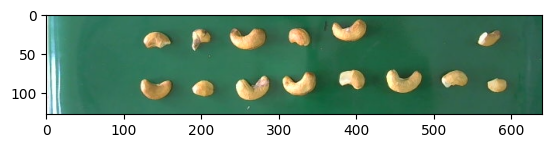

In [495]:
rectangles_found = []
boxes = []
resizing_factor = 1
# for resizing_factor in np.arange(1, 1.1, 0.01):
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

masked_region_resized = cv2.resize(masked_region, (int(L), int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]
print(masked_region_resized.shape)
plt.imshow(masked_region_resized)

masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = False)
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step


my_bool = 0
for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        
        # predict using trained SVM
        #test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        test_prediction_proba = grid.predict_proba(hog_feat_sample.reshape(1,-1))
        
        if test_prediction:
            if test_prediction_proba[0][1] > 0.65:
                rectangle_x_left = int(x_left * resizing_factor)
                rectangle_y_top = int(y_top * resizing_factor)
                window_dim = int(64 * resizing_factor)
                rectangles_found.append(((x_start + rectangle_x_left, rectangle_y_top + y_start),
                                            (x_start + rectangle_x_left + window_dim, rectangle_y_top + window_dim + y_start),test_prediction_proba[0][1]))
                print("Predict: "+str(test_prediction)+", predict_proba: ")
                print(test_prediction_proba)
                my_bool = my_bool+1

In [496]:
rectangles_found

[((96, 210), (160, 274), 0.7896800289438471),
 ((96, 274), (160, 338), 0.887249665795565),
 ((128, 210), (192, 274), 0.9627139849728186),
 ((128, 274), (192, 338), 0.7601556886692321),
 ((160, 274), (224, 338), 0.994839168838735),
 ((192, 210), (256, 274), 0.9128902598009169),
 ((192, 274), (256, 338), 0.8371972819835184),
 ((224, 210), (288, 274), 0.9999835424262012),
 ((224, 274), (288, 338), 0.9999969392824336),
 ((256, 274), (320, 338), 0.9057602673117889),
 ((288, 274), (352, 338), 0.9929029072965736),
 ((352, 210), (416, 274), 0.7498971863996957),
 ((384, 274), (448, 338), 0.7033415298329679),
 ((448, 274), (512, 338), 0.9473841233451015),
 ((576, 274), (640, 338), 0.7008794912949075)]

In [499]:
def NMS(boxes, overlapThresh = 0.8):
    #return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # We have a least a box of one pixel, therefore the +1
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        temp_indices = indices[indices!=i]
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]
        if np.any(overlap) > overlapThresh:
            indices = indices[indices != i]
    return boxes[indices].astype(int)

boxes = []
for rectangle in rectangles_found:
    x1, y1, x2, y2 = rectangle[0][0], rectangle[0][1], rectangle[1][0], rectangle[1][1] 
    new_row = [x1, y1, x2, y2]
    boxes.append(new_row)
boxes = np.array(boxes)
# boxes = NMS(boxes=boxes)
boxes

array([[ 96, 210, 160, 274],
       [ 96, 274, 160, 338],
       [128, 210, 192, 274],
       [128, 274, 192, 338],
       [160, 274, 224, 338],
       [192, 210, 256, 274],
       [192, 274, 256, 338],
       [224, 210, 288, 274],
       [224, 274, 288, 338],
       [256, 274, 320, 338],
       [288, 274, 352, 338],
       [352, 210, 416, 274],
       [384, 274, 448, 338],
       [448, 274, 512, 338],
       [576, 274, 640, 338]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


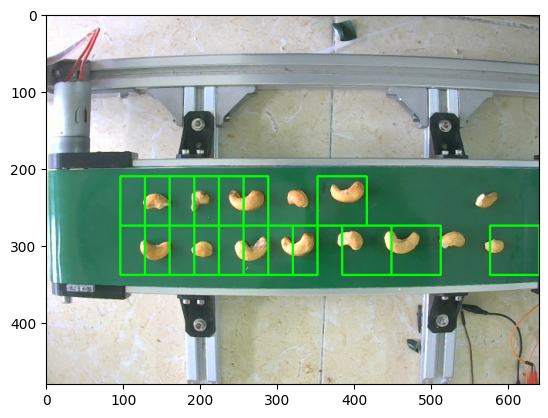

In [500]:
Image_with_Rectangles_Drawn = np.copy(test_image)

for rectangle in boxes:
    x1, y1, x2, y2 = rectangle[0], rectangle[1], rectangle[2], rectangle[3]
    cv2.rectangle(Image_with_Rectangles_Drawn, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(Image_with_Rectangles_Drawn)